In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from analysis import load_data, get_flipped, get_trial_stats, get_correct_scores, get_flipping_stats

In [2]:
test_df, experiment_df = load_data()

In [ ]:
experiment_df.shape[0]

In [ ]:
experiment_df.info()

In [ ]:
test_df.groupby("subject")["correct"].value_counts().xs(True, level=1)

In [ ]:
experiment_df.groupby("subject")["correct"].value_counts()

In [ ]:
test_df.groupby("subject")["correct"].value_counts(normalize=True).xs(True,level=1).mean()

In [ ]:
experiment_df[experiment_df["rt"] < float("inf")].groupby("subject")["rt"].describe()

In [ ]:
experiment_df.groupby("subject")["flipped"].value_counts()

In [ ]:
experiment_df[experiment_df["flipped"] == True]

In [ ]:
experiment_df["subject"].value_counts()

In [ ]:
df = get_flipped(test_df, is_test=True)
get_correct_scores(df)

In [ ]:
get_correct_scores(test_df)

In [ ]:
experiment_df.groupby("subject")["flipped"].value_counts(normalize=True).xs(True,level=1)

In [ ]:
print(get_correct_scores(experiment_df))

In [4]:
print(get_flipping_stats(experiment_df[~experiment_df["subject"].isin(["subject_8", "subject_9"])], is_test=False))

{'count': subject_4    62
subject_0    59
subject_3    52
subject_6    52
subject_7    42
subject_5    37
subject_1    17
subject_2    17
subject_8     0
subject_9     0
Name: subject, dtype: int64, 'frequency': [0.5081967213114754, 0.43023255813953487, 0.4077669902912621, 0.46846846846846846, 0.25757575757575757, 0.49523809523809526, 0.22972972972972974, 0.59], 'freq_keys': ['subject_4', 'subject_5', 'subject_7', 'subject_6', 'subject_2', 'subject_3', 'subject_1', 'subject_0'], 'mean': 0.4234010400942904, 'std': 0.12388638257894073}


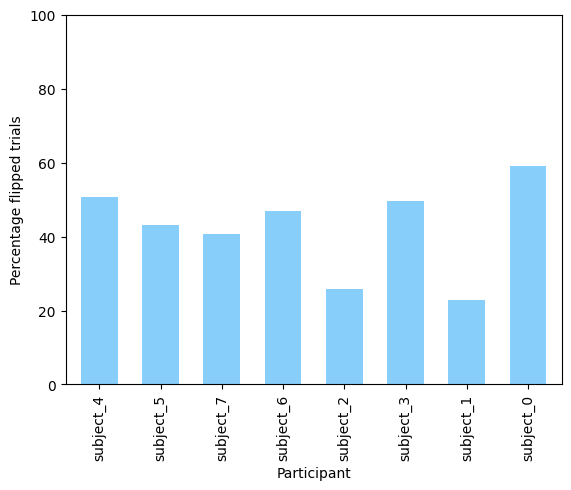

In [14]:
flipped = experiment_df[~experiment_df["subject"].isin(["subject_8", "subject_9"])].groupby("subject", observed=True)["flipped"].value_counts(sort=False,normalize=True).xs(True, level=1) * 100

fig = plt.figure()

ax1 = fig.add_subplot(111)

flipped.plot(kind="bar", color="lightskyblue", ax=ax1, width = 0.6,)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Percentage flipped trials")
ax1.set_ybound(upper=100)

fig.savefig("flipped.png", dpi=300, bbox_inches = "tight", transparent=True)

In [ ]:
exp_stats = get_trial_stats(experiment_df)

test_stats = get_trial_stats(test_df)

print(test_stats)
print(exp_stats)

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

exp_stats["count"].plot(kind="bar", color="blue", ax=ax1, width = 0.4, position=1)

test_stats["count"].plot(kind="bar", color="orange", ax=ax2, width = 0.4, position=0)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Number of Trials")
ax2.set_ylabel("Number of Learned Words")
ax2.set_ybound(upper=130)
ax1.set_ybound(upper=130)

fig.savefig("trials.png", dpi=300, bbox_inches = "tight", transparent=True)

In [ ]:
exp_stats = get_correct_scores(experiment_df)

test_stats = get_correct_scores(test_df)

print(test_stats)
print(exp_stats)

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

test_freq_perc = test_stats["frequency"] * 100

exp_freq_perc = exp_stats["frequency"] * 100

exp_freq_perc.plot(kind="bar", color="lightsalmon", ax=ax1, width = 0.4, position=0)

test_freq_perc.plot(kind="bar", color="lightskyblue", ax=ax2, width = 0.4, position=1)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Percentage correct trials")
ax2.set_ylabel("Percentage correct test questions")
ax2.set_ybound(upper=100)
ax1.set_ybound(upper=100)

fig.savefig("correct.png", dpi=300, bbox_inches = "tight", transparent=True)

In [ ]:
test_flipped = get_flipped(test_df, is_test=True)

exp_flipped = get_flipped(experiment_df)

exp_stats_flipped = get_correct_scores(exp_flipped)

test_stats_flipped = get_correct_scores(test_flipped)

exp_stats = get_correct_scores(experiment_df)

test_stats = get_correct_scores(test_df)

print(test_stats["frequency"])
print(exp_stats["frequency"])

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

test_flip_freq_perc = test_stats_flipped["frequency"] * 100

exp_flip_freq_perc = exp_stats_flipped["frequency"] * 100

test_freq_perc = test_stats["frequency"] * 100

exp_freq_perc = exp_stats["frequency"] * 100


exp_flip_freq_perc.plot(kind="bar", color="lightblue", ax=ax1, width = 0.4, position=1)
exp_freq_perc.plot(kind="bar", color="blue", ax=ax1, width = 0.4, position=1, alpha=0.4)

test_flip_freq_perc.plot(kind="bar", color="orangered", ax=ax2, width = 0.4, position=0)
test_freq_perc.plot(kind="bar", color="orange", ax=ax2, width = 0.4, position=0, alpha=0.5)

ax1.set_xlabel("Participant")
ax1.set_ylabel("Correct Trials")
ax2.set_ylabel("Correct Test Questions")
ax2.set_ybound(upper=100)
ax1.set_ybound(upper=100)

fig.savefig("correct_flipped2.png", dpi=300, bbox_inches = "tight", transparent=True)

In [ ]:
test_flipped = get_flipped(test_df, is_test=True)

exp_flipped = get_flipped(experiment_df)

exp_stats_flipped = get_correct_scores(exp_flipped)

test_stats_flipped = get_correct_scores(test_flipped)

print(exp_stats_flipped)



In [ ]:
print(test_stats_flipped)